In [48]:
import pandas as pd
application_df = pd.read_csv('./archive/application_record.csv')
credit_df = pd.read_csv('./archive/credit_record.csv')

In [49]:
application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [50]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [51]:
credit_month_df = pd.DataFrame(credit_df.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
#credit_month_df
credit_month_df = credit_month_df.rename(columns={'MONTHS_BALANCE': 'MONTHS_BEGINNING'})
credit_month_df = credit_month_df['MONTHS_BEGINNING'] * -1

In [52]:
print(application_df.shape)
print(credit_df.shape)

(438557, 18)
(1048575, 3)


### Checking number of unique IDs in application and credit df as well as the common IDs present in both the dataframes

In [53]:
print("Number of unique id in application_df:", application_df.ID.nunique())
print("Number of unique id in credit_df:", credit_df.ID.nunique())
print("Number of common IDs in application_df and credit_df:", len(set(credit_df['ID']).intersection(set(application_df['ID']))))

Number of unique id in application_df: 438510
Number of unique id in credit_df: 45985
Number of common IDs in application_df and credit_df: 36457


In [54]:
credit_df.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [55]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### Setting the defaulter value in status as value >= 2 to 1 else 0

In [56]:
credit_df['STATUS'].replace({'C': 0, 'X': 0}, inplace = True)
credit_df['STATUS'] = credit_df['STATUS'].astype('int')
credit_df['STATUS'] = credit_df['STATUS'].apply(lambda x: 1 if x >= 2 else 0)

In [57]:
credit_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


### Group credit_df by ID and finding maximum STATUS for each ID, creating credit_target_df

In [58]:
credit_target_df = pd.DataFrame(credit_df.groupby(['ID'])['STATUS'].agg(max))
credit_target_df = credit_target_df.rename(columns={'STATUS': 'TARGET'})

In [59]:
print(credit_month_df.shape)
print(credit_target_df.shape)

(45985,)
(45985, 1)


In [60]:
data = application_df.merge(credit_month_df, on='ID', how='inner')
data = data.merge(credit_target_df, on='ID', how='inner')
data.shape

(36457, 20)

In [61]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BEGINNING,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [63]:
data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BEGINNING           0
TARGET                     0
dtype: int64

In [64]:
data.AMT_INCOME_TOTAL = data['AMT_INCOME_TOTAL'].astype('int')
data.CNT_FAM_MEMBERS = data['CNT_FAM_MEMBERS'].astype('int')

In [65]:
object_col = data.select_dtypes(['object']).columns
int_col = data.select_dtypes(['int']).columns
print(object_col)
print(int_col)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')
Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BEGINNING', 'TARGET'],
      dtype='object')


In [66]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

In [67]:
data['OCCUPATION_TYPE'].fillna('XNA', inplace = True)

In [68]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BEGINNING       0
TARGET                 0
dtype: int64

In [69]:
data.TARGET.skew()

7.497016312853248

In [70]:
data.TARGET.value_counts(normalize = True)

0    0.983103
1    0.016897
Name: TARGET, dtype: float64

In [71]:
data['TARGET'][data['OCCUPATION_TYPE'] == 'XNA'].value_counts(normalize=True)

0    0.982867
1    0.017133
Name: TARGET, dtype: float64

### Dealing with the categorical variables

In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_col:
    column_name = col + '_ENCODED'
    data[column_name] = label_encoder.fit_transform(data[col])

In [73]:
data[['ID', 'CODE_GENDER', 'CODE_GENDER_ENCODED']].sample(10)

,ID,CODE_GENDER,CODE_GENDER_ENCODED
24015,5096542,F,0
18259,5068911,F,0
9412,5041655,F,0
10639,5045776,M,1
27149,5113704,F,0
31283,5126768,F,0
28601,5116418,F,0
8786,5038646,F,0
23086,5095116,F,0
11353,5047825,F,0


In [74]:
data.set_index('ID', inplace = True)
data.drop(columns = object_col, axis = 1, inplace = True)

In [75]:
data.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BEGINNING,TARGET,CODE_GENDER_ENCODED,FLAG_OWN_CAR_ENCODED,FLAG_OWN_REALTY_ENCODED,NAME_INCOME_TYPE_ENCODED,NAME_EDUCATION_TYPE_ENCODED,NAME_FAMILY_STATUS_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED
ID,,,,,,,,,,,,,,,,,,,
5008804,0,427500,-12005,-4542,1,1,0,0,2,15,0,1,1,1,4,1,0,4,18
5008805,0,427500,-12005,-4542,1,1,0,0,2,14,0,1,1,1,4,1,0,4,18
5008806,0,112500,-21474,-1134,1,0,0,0,2,29,0,1,1,1,4,4,1,1,16
5008808,0,270000,-19110,-3051,1,0,1,1,1,4,0,0,0,1,0,4,3,1,14
5008809,0,270000,-19110,-3051,1,0,1,1,1,26,0,0,0,1,0,4,3,1,14


In [76]:
from sklearn.model_selection import train_test_split
y = data['TARGET']
X = data.drop('TARGET', axis = 1)
print(X.head())
print(y.head())

         CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
ID                                                                   
5008804             0            427500      -12005          -4542   
5008805             0            427500      -12005          -4542   
5008806             0            112500      -21474          -1134   
5008808             0            270000      -19110          -3051   
5008809             0            270000      -19110          -3051   

         FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
ID                                                                              
5008804           1                1           0           0                2   
5008805           1                1           0           0                2   
5008806           1                0           0           0                2   
5008808           1                0           1           1                1   
5008809           1    

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25519, 18)
(10938, 18)
(25519,)
(10938,)


## SMOTE Analysis (Synthetic Minorty Over-sampling Technique)

In [79]:
conda install -c conda-forge imbalanced-learn

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
/ DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/os

In [80]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [81]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(50164, 18)
(50164,)


In [82]:
y_train_resampled.value_counts()

0    25082
1    25082
Name: TARGET, dtype: int64

In [83]:
y_train.value_counts()

0    25082
1      437
Name: TARGET, dtype: int64

## Feature Selection using RFE (Recursive Feature Elimination)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

n_features_to_select = 12

rf_classifier = RandomForestClassifier(random_state=42)
rfe = RFE(estimator = rf_classifier, n_features_to_select = n_features_to_select)

rfe.fit(X_train_resampled, y_train_resampled)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=12)

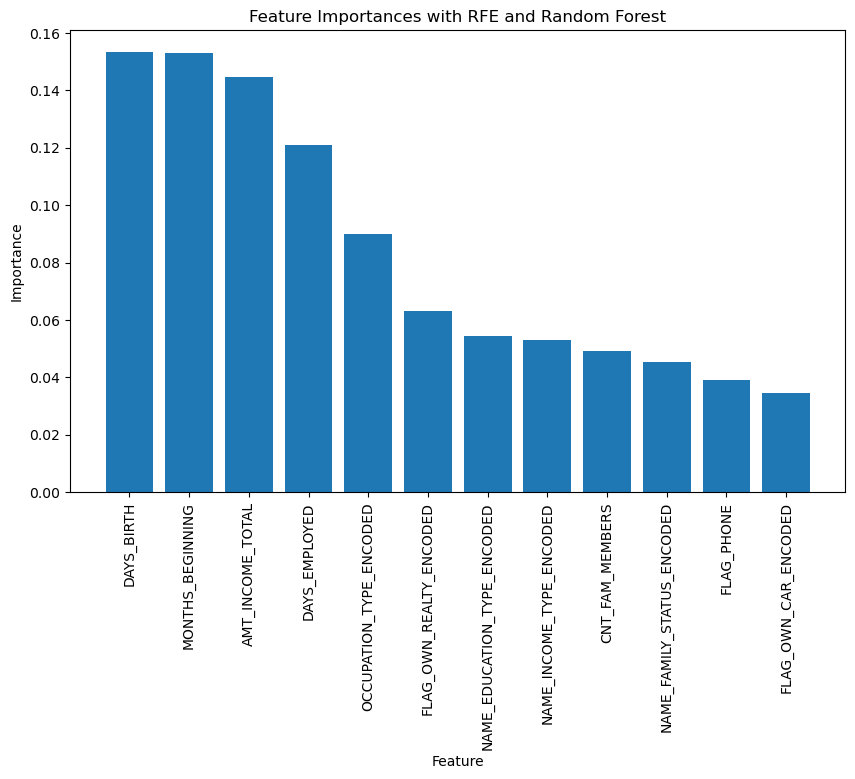

In [85]:
import matplotlib.pyplot as plt
import numpy as np
selected_features = X_train.columns[rfe.support_]
feature_importances = rfe.estimator_.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = selected_features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances with RFE and Random Forest")
plt.show()

# Models

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import itertools

def plot_roc_curve(model, X, y):
    y_pred_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    auc_score = roc_auc_score(y, y_pred_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0,1], [0,1], '--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend()
    plt.show()

def plot_precision_recall_curve(model, X, y):
    y_pred_prob = model.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pred_prob)
    avg_precision = average_precision_score(y, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label="Precision-Recall Curve (Avg Precision = {:.2f})").format(avg_precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()
    
def plot_confusion_matrix(cm, classes, normalize = False, title="Confusion Matrix", cmap = plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color = 'white' if cm[i, j]> thresh else 'black')
        plt.tight_layout()
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

In [88]:
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train_resampled[selected_features]

In [96]:
param_dist = {
    'n_estimators': randint(50,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

rf_classifier = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf_classifier, 
                                   param_distributions = param_dist, 
                                   n_iter = 10, 
                                   cv=5, 
                                   random_state=42, 
                                   n_jobs = -1,)
random_search.fit(X_train_selected, y_train_resampled)
best_rf_model = random_search.best_estimator_
print("Best Hyperparamters: ")
print(random_search.best_params_)

/Users/j/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/j/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/j/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/j/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/j/anaconda3/lib/

Best Hyperparamters: 
{'max_depth': 47, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 71}


In [100]:
from sklearn.model_selection import cross_val_score

best_rf_model = RandomForestClassifier(max_depth=47, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=71, random_state=42)

cv_scores = cross_val_score(best_rf_model, X_train_selected, y_train_resampled, cv=5, scoring='accuracy')
print("Cross validation score")
print(cv_scores)
print("Mean Accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard Deviation: {:.4f}".format(cv_scores.std()))

Cross validation score
[0.97338782 0.98983355 0.99003289 0.98973388 0.99013158]
Mean Accuracy: 0.9866
Standard Deviation: 0.0066
